# Day 12

[Rain Risk](https://adventofcode.com/2020/day/12)

## Part 1

Your ferry made decent progress toward the island, but the storm came in faster than anyone expected. The ferry needs to take evasive actions!

Unfortunately, the ship's navigation computer seems to be malfunctioning; rather than giving a route directly to safety, it produced extremely circuitous instructions. When the captain uses the PA system to ask if anyone can help, you quickly volunteer.

The navigation instructions (your puzzle input) consists of a sequence of single-character actions paired with integer input values. After staring at them for a few minutes, you work out what they probably mean:

    Action N means to move north by the given value.
    Action S means to move south by the given value.
    Action E means to move east by the given value.
    Action W means to move west by the given value.
    Action L means to turn left the given number of degrees.
    Action R means to turn right the given number of degrees.
    Action F means to move forward by the given value in the direction the ship is currently facing.

The ship starts by facing east. Only the L and R actions change the direction the ship is facing. (That is, if the ship is facing east and the next instruction is N10, the ship would move north 10 units, but would still move east if the following action were F.)

For example:

F10
N3
F7
R90
F11

These instructions would be handled as follows:

    F10 would move the ship 10 units east (because the ship starts by facing east) to east 10, north 0.
    N3 would move the ship 3 units north to east 10, north 3.
    F7 would move the ship another 7 units east (because the ship is still facing east) to east 17, north 3.
    R90 would cause the ship to turn right by 90 degrees and face south; it remains at east 17, north 3.
    F11 would move the ship 11 units south to east 17, south 8.

At the end of these instructions, the ship's Manhattan distance (sum of the absolute values of its east/west position and its north/south position) from its starting position is 17 + 8 = 25.

Figure out where the navigation instructions lead. What is the Manhattan distance between that location and the ship's starting position?

In [1]:
input_data = open('input/day 12.txt').read().splitlines()

In [2]:
L90 = {'E': 'N', 'N': 'W', 'W': 'S', 'S': 'E'}
R90 = {'E': 'S', 'S': 'W', 'W': 'N', 'N': 'E'}
T180 = {'E': 'W', 'W': 'E', 'S': 'N', 'N': 'S'}
turns = {'L90': L90, 'R90': R90, 'L180': T180, 'R180': T180, 'L270': R90, 'R270': L90}

def move(x, y, direction, units):
    if direction == 'N':
        return x, y + units
    elif direction == 'S':
        return x, y - units
    elif direction == 'E':
        return x - units, y
    elif direction == 'W':
        return x + units, y
    else:
        raise ValueError('Invalid Direction')

x, y = 0, 0
direction = 'E'
for instruction in input_data:
    if instruction in turns:
        direction = turns[instruction][direction]
    else:
        command = instruction[0]
        units = int(instruction[1:])
        if command == 'F':
            # forward; use existing direction
            command = direction
        try:
            x, y = move(x, y, command, units)
        except ValueError as e:
            print('Invalid instruction encountered:', instruction)
print(f'{x}, {y} = {x + y} manhattan distance')

589, 632 = 1221 manhattan distance


## Part 2

Before you can give the destination to the captain, you realize that the actual action meanings were printed on the back of the instructions the whole time.

Almost all of the actions indicate how to move a waypoint which is relative to the ship's position:

    Action N means to move the waypoint north by the given value.
    Action S means to move the waypoint south by the given value.
    Action E means to move the waypoint east by the given value.
    Action W means to move the waypoint west by the given value.
    Action L means to rotate the waypoint around the ship left (counter-clockwise) the given number of degrees.
    Action R means to rotate the waypoint around the ship right (clockwise) the given number of degrees.
    Action F means to move forward to the waypoint a number of times equal to the given value.

The waypoint starts 10 units east and 1 unit north relative to the ship. The waypoint is relative to the ship; that is, if the ship moves, the waypoint moves with it.

For example, using the same instructions as above:

    F10 moves the ship to the waypoint 10 times (a total of 100 units east and 10 units north), leaving the ship at east 100, north 10. The waypoint stays 10 units east and 1 unit north of the ship.
    N3 moves the waypoint 3 units north to 10 units east and 4 units north of the ship. The ship remains at east 100, north 10.
    F7 moves the ship to the waypoint 7 times (a total of 70 units east and 28 units north), leaving the ship at east 170, north 38. The waypoint stays 10 units east and 4 units north of the ship.
    R90 rotates the waypoint around the ship clockwise 90 degrees, moving it to 4 units east and 10 units south of the ship. The ship remains at east 170, north 38.
    F11 moves the ship to the waypoint 11 times (a total of 44 units east and 110 units south), leaving the ship at east 214, south 72. The waypoint stays 4 units east and 10 units south of the ship.

After these operations, the ship's Manhattan distance from its starting position is 214 + 72 = 286.

Figure out where the navigation instructions actually lead. What is the Manhattan distance between that location and the ship's starting position?

In [3]:
def turn_left(vector):
    x, y = vector
    return -y, x

def turn_right(vector):
    x, y = vector
    return y, -x

def move(position, vector, units):
    x, y = position
    dx, dy = vector
    return x + dx*units, y + dy*units

def move_waypoint(position, direction, units):
    x, y = position
    if direction == 'N':
        return x, y + units
    elif direction == 'S':
        return x, y - units
    elif direction == 'W':
        return x - units, y
    elif direction == 'E':
        return x + units, y

waypoint = (10, 1)
ship = (0, 0)
route = []
for instruction in input_data:
    route.append(ship)
    command, units = instruction[0], int(instruction[1:])
    if command == 'F':
        ship = move(ship, waypoint, units)
    elif command == 'L':
        for i in range(units // 90):
            waypoint = turn_left(waypoint)
    elif command == 'R':
        for i in range(units // 90):
            waypoint = turn_right(waypoint)
    elif command in 'NESW':
        waypoint = move_waypoint(waypoint, command, units)
x, y = ship
print(f'({abs(x)}, {abs(y)}) = {abs(x) + abs(y)}')
        

(32313, 27122) = 59435


In [5]:
x, y = zip(*route)

(-34862.5, 6926.5, -5847.45, 38162.45)

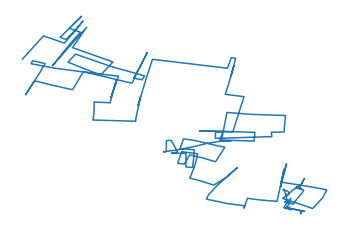

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.axis('off')